<a href="https://colab.research.google.com/github/Ghost970916/Ghost970916/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EJERCICIO #1

<ipython-input-17-3da706b96ec6>:11: FutureWarning: The operation <function mean at 0x7d732bb204c0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df_group_year = df.groupby("Year").agg(np.mean)


m = 0.023522370249706537
c = -27.887365027932873

Model Definition
y = 0.02352x + -27.8874


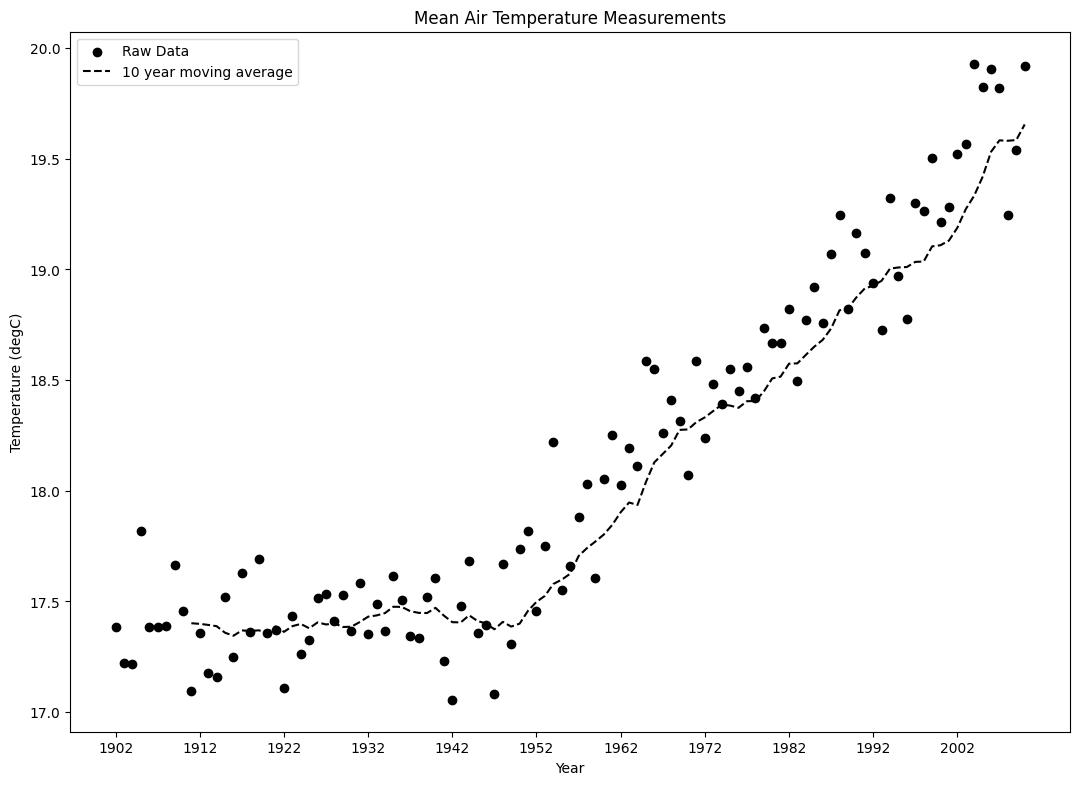

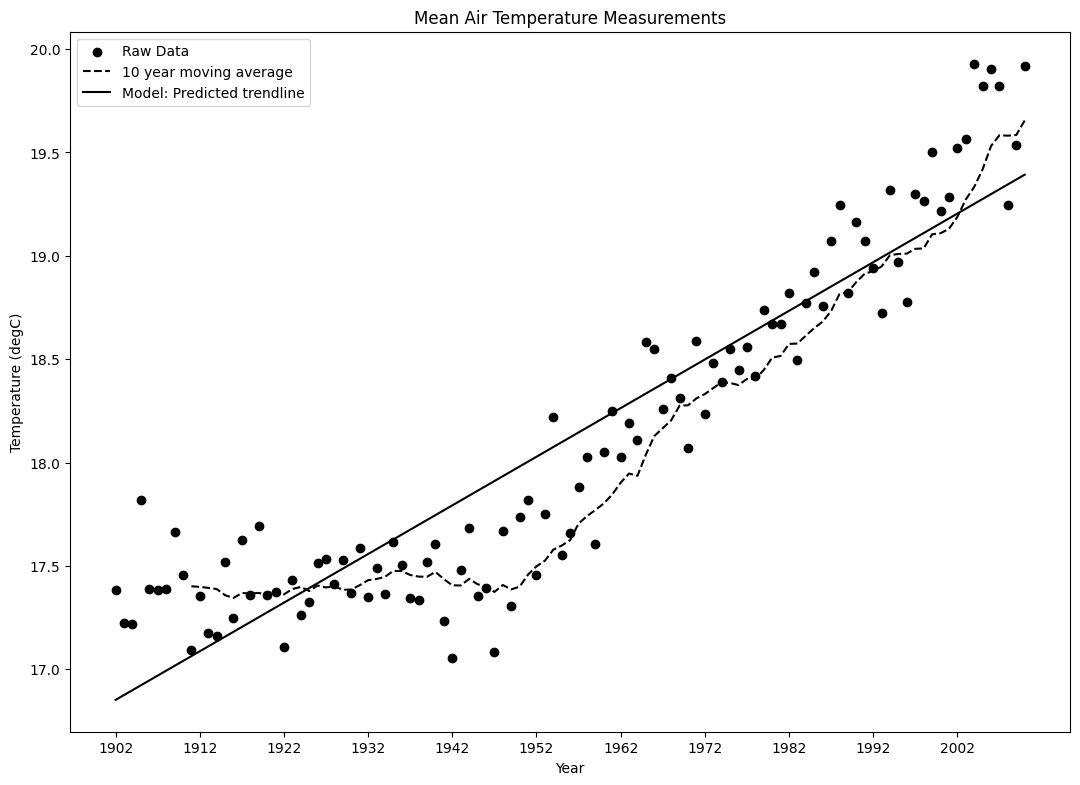

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/datasets/synth_temp.csv")
df.head()

df = df.loc[df.Year > 1901]
df.head()

df_group_year = df.groupby("Year").agg(np.mean)
df_group_year.head()

window = 10
rolling = df_group_year.RgnAvTemp.rolling(window).mean()
rolling.head(n=20)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
# Temp measurements
ax.scatter(df_group_year.index, df_group_year.RgnAvTemp,
             label='Raw Data', c='k');
ax.plot(df_group_year.index, rolling, c='k', linestyle='--',
label=f'{window} year moving average');
ax.set_title('Mean Air Temperature Measurements')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (degC)')
ax.set_xticks(
             range(df_group_year.index.min(), df_group_year.index.max(),10))
ax.legend();

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df_group_year.index.values.reshape((-1, 1)), df_group_year.RgnAvTemp)

print(f'm = {model.coef_[0]}')
print(f'c = {model.intercept_}')
print('\nModel Definition')
print(f'y = {model.coef_[0]:0.4}x + {model.intercept_:0.4f}')

trend_x = np.array([
df_group_year.index.values.min(),
df_group_year.index.values.mean(),
df_group_year.index.values.max()
])
trend_y = model.predict(trend_x.reshape((-1, 1)))
trend_y

fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
# Temp measurements
ax.scatter(df_group_year.index, df_group_year.RgnAvTemp,
label='Raw Data', c='k');
ax.plot(df_group_year.index, rolling, c='k', linestyle='--',
label=f'{window} year moving average');
ax.plot(trend_x, trend_y, c='k', label='Model: Predicted trendline')
ax.set_title('Mean Air Temperature Measurements')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (degC)')
ax.set_xticks(range(df_group_year.index.min(), df_group_year.index.max(),
10))
ax.legend();




EJERCICIO #2

<ipython-input-37-3679f9d596d7>:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(group['sepal.length'],
<ipython-input-37-3679f9d596d7>:32: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(group['sepal.length'], group['petal.width'],


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

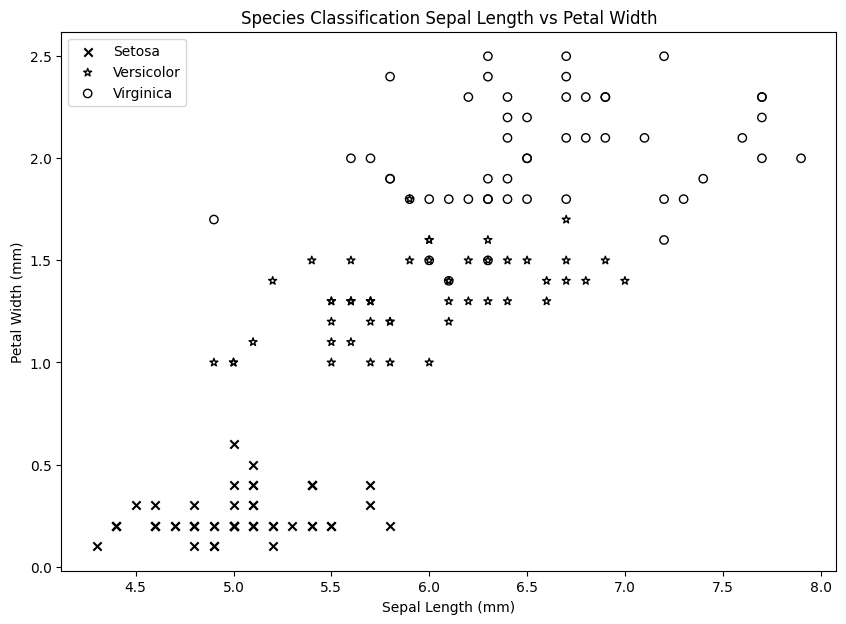

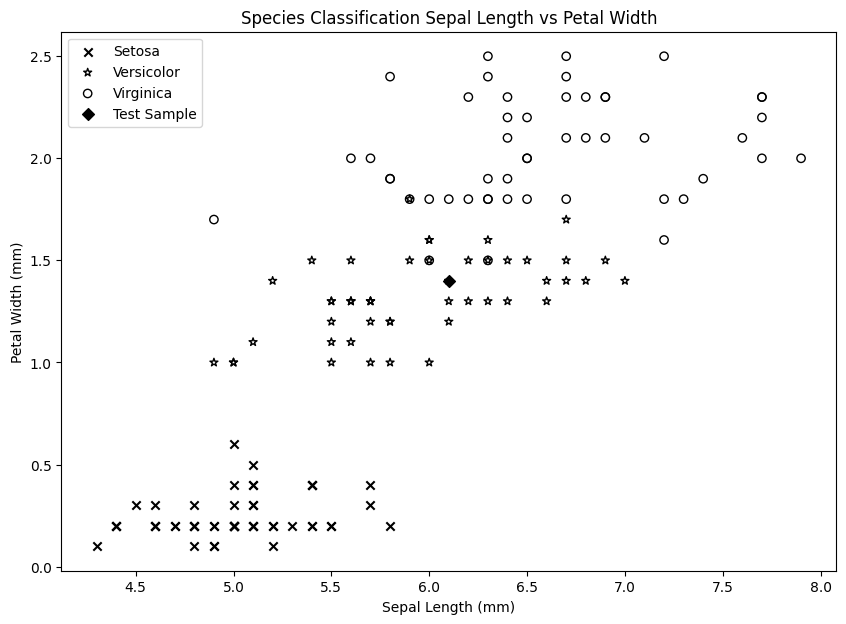

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN

df = pd.read_csv("/content/datasets/iris.csv")
df

markers = {
    'Setosa': {'marker': 'x', 'facecolor': 'k', 'edgecolor': 'k'},
    'Versicolor': {'marker': '*', 'facecolor': 'none', 'edgecolor':'k'},
    'Virginica': {'marker': 'o', 'facecolor': 'none', 'edgecolor':'k'},
}
plt.figure(figsize=(10, 7))
for name, group in df.groupby('variety'):
    plt.scatter(group['sepal.length'],
                group['petal.width'],
                label=name,
                marker=markers[name]['marker'],
                facecolors=markers[name]['facecolor'],
                edgecolor=markers[name]['edgecolor'])
plt.title('Species Classification Sepal Length vs Petal Width');
plt.xlabel('Sepal Length (mm)');
plt.ylabel('Petal Width (mm)');
plt.legend();

df_test = df.iloc[134]
df = df.drop([134]) # Remove the sample
df_test

plt.figure(figsize=(10, 7))
for name, group in df.groupby('variety'):
    plt.scatter(group['sepal.length'], group['petal.width'],
    label=name,
    marker=markers[name]['marker'],
    facecolors=markers[name]['facecolor'],
    edgecolor=markers[name]['edgecolor'])
plt.scatter(df_test['sepal.length'], df_test['petal.width'], label='Test Sample', c='k',
marker='D')
plt.title('Species Classification Sepal Length vs Petal Width');
plt.xlabel('Sepal Length (mm)');
plt.ylabel('Petal Width (mm)');
plt.legend();

model = KNN(n_neighbors=3)
model.fit(X=df[['petal.width', 'sepal.length']], y=df.variety)
model.get_params()



EJERCICIO #3

descomentariar una linea de codigo y comentariar las demas para probarlas de una en una

In [36]:
model.score(X=df[['petal.width', 'sepal.length']], y=df.variety)
#model.predict(df_test[['petal.width', 'sepal.length']].values.reshape((-1,2)))[0]
#df.iloc[134].variety

0.9731543624161074

EJERCICIO #4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv("/content/datasets/iris.csv")

np.random.seed(10)
samples = np.random.randint(0, len(df), 10)
df_test = df.iloc[samples]
df = df.drop(samples)

model = DecisionTreeClassifier()
model  =  model.fit(df[['sepal.length',  'sepal.width',  'petal.length',  'petal.width']],
df.variety)
model.score(df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']], df.variety)

model.score(df_test[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']],
df_test.variety)

EJERCICIO #5

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data)
graphs